In [80]:
#this program classify image
!pip install keras



In [13]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
#Load the Data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [17]:
#look at the data type variables
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
#get the shape of the arrays
print('x_train shape ',x_train.shape)
print('y_train shape ',y_train.shape)
print('x_test shape ',x_test.shape)
print('y_test shape ',y_test.shape)

x_train shape  (50000, 32, 32, 3)
y_train shape  (50000, 1)
x_test shape  (10000, 32, 32, 3)
y_test shape  (10000, 1)


In [50]:
#Look at the first image
index=10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

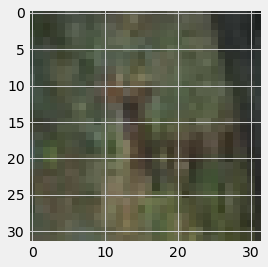

In [51]:
#show image as a picture
img = plt.imshow(x_train[index])

In [52]:
#get the image label
print('The Image label is ', y_train[index])

The Image label is  [4]


In [53]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship', 'truck', 'car']
#print the image class
print('the image class is ',classification[y_train[index][0]])

the image class is  deer


In [54]:
#convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot  = to_categorical(y_test)

In [55]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [56]:
#print new label of the image/picture
print('the one hot label is ', y_train_one_hot[index])

the one hot label is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [57]:
#Normalize the pictures to be values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[index]

In [63]:
#create the models architecture
model = Sequential()

#Add  the first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add another convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

#Add another Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add Flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000,activation='relu'))

#Add a Dropout layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500,activation='relu'))

#Add a Dropout layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250,activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10,activation='softmax'))




In [65]:
#compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [66]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs=10,
                 validation_split  = 0.2)

Epoch 1/10
157/157 [==============================] - 63s 394ms/step - loss: 1.8263 - accuracy: 0.3146 - val_loss: 1.5226 - val_accuracy: 0.4472
Epoch 2/10
157/157 [==============================] - 62s 393ms/step - loss: 1.4313 - accuracy: 0.4778 - val_loss: 1.3130 - val_accuracy: 0.5143
Epoch 3/10
157/157 [==============================] - 62s 397ms/step - loss: 1.2635 - accuracy: 0.5451 - val_loss: 1.2208 - val_accuracy: 0.5627
Epoch 4/10
157/157 [==============================] - 62s 396ms/step - loss: 1.1444 - accuracy: 0.5904 - val_loss: 1.1308 - val_accuracy: 0.5981
Epoch 5/10
157/157 [==============================] - 62s 397ms/step - loss: 1.0612 - accuracy: 0.6237 - val_loss: 1.0580 - val_accuracy: 0.6249
Epoch 6/10
157/157 [==============================] - 63s 403ms/step - loss: 0.9945 - accuracy: 0.6500 - val_loss: 1.0345 - val_accuracy: 0.6347
Epoch 7/10
157/157 [==============================] - 63s 404ms/step - loss: 0.9243 - accuracy: 0.6728 - val_loss: 0.9871 - val_ac

In [67]:
#evaluate the model using test dataset
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 6s 18ms/step - loss: 0.9530 - accuracy: 0.6727


0.6726999878883362

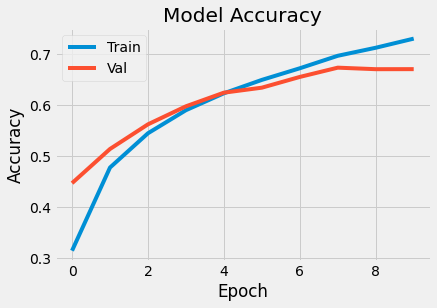

In [70]:
#visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

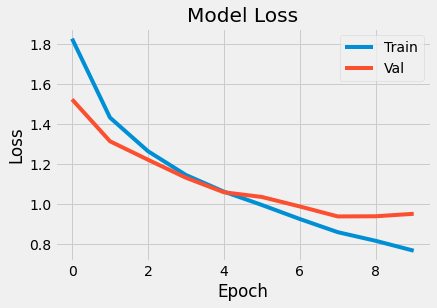

In [71]:
#visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [73]:
#Test the model with example
from google.colab import files
uploaded = files.upload()

Saving download.jpg to download.jpg


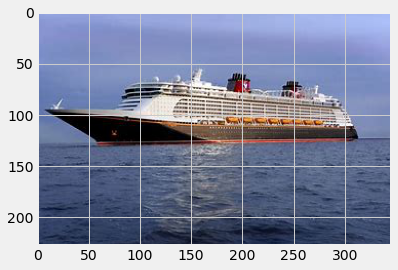

In [74]:
#show the image
new_img = plt.imread('download.jpg')
img = plt.imshow(new_img)

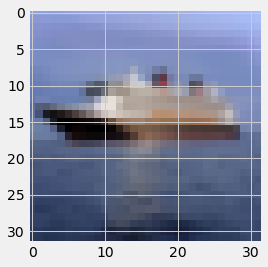

In [83]:
#Resize the image 
from skimage.transform import resize
resized_img = resize(new_img,(32,32,3))
img = plt.imshow(resized_img)

In [85]:
#Get the models prediction
predictions = model.predict(np.array([resized_img]))
#show predictions
predictions


array([[2.6511045e-02, 9.6073789e-05, 1.6776321e-04, 2.9345651e-05,
        1.7849403e-05, 1.3314606e-06, 3.7788755e-06, 6.1746124e-07,
        9.7300243e-01, 1.6978235e-04]], dtype=float32)

In [88]:
#sort the predictions fromm least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#show the sorted labels in order
print(list_index)

[8, 0, 9, 2, 1, 3, 4, 6, 5, 7]


In [89]:
#print first  predictions
for i in range(5):
  print(classification[list_index[i]])

ship
airplane
truck
bird
automobile


In [92]:
#print first  predictions
for i in range(5):
  print(classification[list_index[i]],':', round(predictions[0][list_index[i]]*100,2),'%')

ship : 97.3 %
airplane : 2.65 %
truck : 0.02 %
bird : 0.02 %
automobile : 0.01 %
